In [1]:
# Import basic packages
import numpy as np
import scipy as sp
import pandas as pd
from astropy.io import fits


# ==== Scikit-learn =======================
# Preprocessing
from sklearn.preprocessing import StandardScaler #Standar scaler for standardization
from sklearn.model_selection import train_test_split # For random split

# Classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# ==========================================
# Matplotlib, urlib etc 
import urllib
import urllib.request
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from PIL import Image
%matplotlib inline

### Import feature matrix and labels

In [3]:
X_feat_real = np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/training_new/X_mat_v4_a.npy")
y_lab_real = np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/training_new/y_lab_v4_a.npy")

print("Number of visually inspected LSBGs: ",len(y_lab_real[y_lab_real==1]))
print("Artifacts: ",len(y_lab_real[y_lab_real==0]))

Number of visually inspected LSBGs:  30475
Artifacts:  36578


### Look at the Feature Distributions of Real LSBGs+Artifact+Simulations

In [4]:
index_real=(y_lab_real==1)
index_art=(y_lab_real==0)

X_art = X_feat_real[index_art]
X_lsbg = X_feat_real[index_real]

y_art = y_lab_real[index_art]
y_lsbg = y_lab_real[index_real]

### Split data set for training and testing

In [5]:
X_train_art, X_test_art, y_train_art, y_test_art = train_test_split(X_art, y_art,
                                                                        train_size = 0.70, random_state = 42)
X_train_lsbg, X_test_lsbg, y_train_lsbg, y_test_lsbg = train_test_split(X_lsbg, y_lsbg,
                                                                        train_size = 0.70, random_state = 42)


print("ARTIFACTS:",len(X_train_art), len(X_test_art))
print("LSBGs:",len(X_train_lsbg), len(X_test_lsbg))

ARTIFACTS: 25604 10974
LSBGs: 21332 9143


In [6]:
X_train = np.concatenate((X_train_art,X_train_lsbg))
y_train = np.concatenate((y_train_art,y_train_lsbg))

# Standardize the two sets
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

(22.0, 35.0)

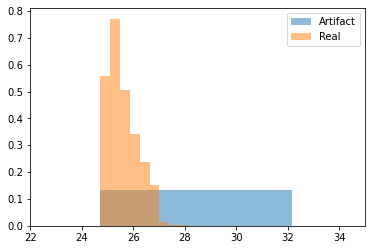

In [7]:
plt.hist(X_train_art[:,13], alpha=0.5,density=True,label='Artifact')
plt.hist(X_train_lsbg[:,13], alpha=0.5,density=True,label='Real')
plt.legend()
plt.xlim([22, 35])

### Random Search Cross Validation in Scikit-Learn

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

In [9]:
#Number of trees in random forest
n_estimators_list = list(range(10,220,50))
criterion_list =['gini','entropy','log_loss']
# Maximum number of levels in tree
max_depth_list = list(range(5,50,10))
max_depth_list.append(None)
max_features_list = ['auto', 'sqrt','log2']

# Minimum number of samples required to split a node
min_samples_split_list = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf_list = list(range(1,50,1))
# Method of selecting samples for training each tree
#bootstrap = [True, False]

In [10]:
# Create the random grid
params_grid = {'n_estimators': n_estimators_list,
               'criterion': criterion_list,
               'max_depth': max_depth_list,
               'max_features': max_features_list,
               'min_samples_split': min_samples_split_list,
               'min_samples_leaf': min_samples_leaf_list}
print(params_grid)

{'n_estimators': [10, 60, 110, 160, 210], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [5, 15, 25, 35, 45, None], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}


In [12]:
#def my_roc_auc_score(model,X,y): return metrics.roc_auc_score(y,model.predict(X))
def my_score(model,X,y): return metrics.f1_score(y,model.predict(X))


model_rf= RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                            param_distributions=params_grid,
                            n_iter=50,
                            cv=3,
                            scoring=my_score,
                            return_train_score=True,
                            verbose=0)
model_rf.fit(X_train,y_train)

/home/s1/kherron/mambaforge/envs/apsenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/s1/kherron/mambaforge/envs/apsenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/s1/kherron/mambaforge/envs/apsenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_

/home/s1/kherron/mambaforge/envs/apsenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/s1/kherron/mambaforge/envs/apsenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/s1/kherron/mambaforge/envs/apsenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 15, 25, 35, 45, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 60, 110, 160,
                                                         210]},
                   return_train_score=True,
                   scoring=<function my_score at 0x7f1da5446a70>)

In [13]:
model_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 25,
 'criterion': 'log_loss'}

### GridSearchCV

In [14]:
n_estimators_list = [180,210,230]
criterion_list =['entropy']
max_depth_list = [3,5,10]
max_features_list = ['auto']
min_samples_split_list = [8,10,12]
min_samples_leaf_list = [2,3]

params_grid = {'n_estimators': n_estimators_list,
               'criterion': criterion_list,
               'max_depth': max_depth_list,
               'max_features': max_features_list,
               'min_samples_split': min_samples_split_list,
               'min_samples_leaf': min_samples_leaf_list}
print(params_grid)

{'n_estimators': [180, 210, 230], 'criterion': ['entropy'], 'max_depth': [3, 5, 10], 'max_features': ['auto'], 'min_samples_split': [8, 10, 12], 'min_samples_leaf': [2, 3]}


In [15]:
#def my_roc_auc_score(model,X,y): return metrics.roc_auc_score(y,model.predict(X))

model_rf= GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                            param_grid=params_grid,
                            cv=3,
                            scoring=my_score,
                            return_train_score=True,
                            verbose=0)
model_rf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 10],
                         'max_features': ['auto'], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [180, 210, 230]},
             return_train_score=True,
             scoring=<function my_score at 0x7f97200f61f0>)

In [17]:
model_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 230}

### One more time

In [18]:
n_estimators_list = [230, 250]
criterion_list =['entropy']
max_depth_list = [5]
max_features_list = ['auto']
min_samples_split_list = [12,15]
min_samples_leaf_list = [2]

params_grid = {'n_estimators': n_estimators_list,
               'criterion': criterion_list,
               'max_depth': max_depth_list,
               'max_features': max_features_list,
               'min_samples_split': min_samples_split_list,
               'min_samples_leaf': min_samples_leaf_list}
print(params_grid)

{'n_estimators': [230, 250], 'criterion': ['entropy'], 'max_depth': [5], 'max_features': ['auto'], 'min_samples_split': [12, 15], 'min_samples_leaf': [2]}


In [19]:
#def my_roc_auc_score(model,X,y): return metrics.roc_auc_score(y,model.predict(X))

model_rf= GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                            param_grid=params_grid,
                            cv=3,
                            scoring=my_score,
                            return_train_score=True,
                            verbose=0)
model_rf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy'], 'max_depth': [5],
                         'max_features': ['auto'], 'min_samples_leaf': [2],
                         'min_samples_split': [12, 15],
                         'n_estimators': [230, 250]},
             return_train_score=True,
             scoring=<function my_score at 0x7f97200f61f0>)

In [20]:
model_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 230}